Date: 2/25/2022 <br>
Updated: 5/9/2022 <br>
Author: Kylie Zhang <br>

This project analyzes what determines the gross income of a movie, and predicts movie income with a linear model. <br>

Step 1. Download data and take big view (preliminary heatmap plot) <br>
Step 2. Get data ready and explore data (data cleaning and data validation) <br>
Step 3. Correlation Analysis (correlation matrix, reg plot, strip plot) <br>
Step 4. Linear Regression <br>
Step 5. Machine Learning model (linear model)

### Step 1. Download data and take big view

In [30]:
# data downloaded from https://www.kaggle.com/danielgrijalvas/movies

import numpy as np
import pandas as pd
import os
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision = 4, suppress=True)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (10,6))
plt.style.use('seaborn-white')

In [31]:
# load data using Pandas

dfRaw = pd.read_csv('Movie Project - raw data.csv')
pd.set_option('display.max_columns', None)

In [32]:
# look at the real data

dfRaw.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [33]:
dfRaw.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [34]:
# Summary of the movie data : columns and basic statistics

dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In total 15 columns, 7668 obs. Budget info is missing for some rows. <br>


score = IMDb score <br>
votes = count of IMDb user votes <br>
gross = gross revenue --> variable of interest

In [35]:
dfRaw.describe().apply(lambda s: s.apply('{0:,.3f}'.format))

,year,score,votes,budget,gross,runtime
count,"7,668.000","7,665.000","7,665.000","5,497.000","7,479.000","7,664.000"
mean,"2,000.405",6.390,"88,108.505","35,589,876.193","78,500,541.018",107.262
std,11.154,0.969,"163,323.764","41,457,296.602","165,725,124.319",18.581
min,"1,980.000",1.900,7.000,"3,000.000",309.000,55.000
25%,"1,991.000",5.800,"9,100.000","10,000,000.000","4,532,055.500",95.000
50%,"2,000.000",6.500,"33,000.000","20,500,000.000","20,205,757.000",104.000
75%,"2,010.000",7.100,"93,000.000","45,000,000.000","76,016,691.500",116.000
max,"2,020.000",9.300,"2,400,000.000","356,000,000.000","2,847,246,203.000",366.000


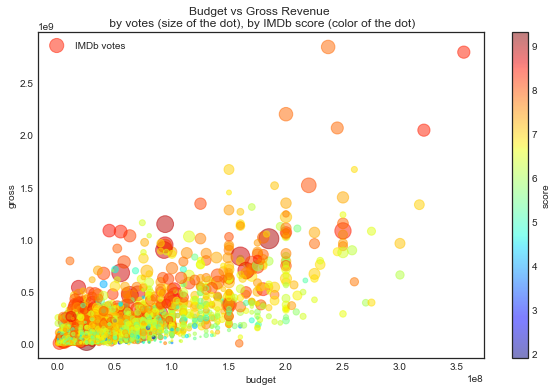

In [36]:
## Heatmap for gross revenue and budget, featuring IMDb score and votes.

dfRaw.plot(kind='scatter', x='budget', y='gross', alpha=0.5,
    s=df['votes']/6000, label='IMDb votes',
    c='score', cmap=plt.get_cmap('jet'), colorbar=True,
    sharex=False)

plt.title('Budget vs Gross Revenue \n by votes (size of the dot), by IMDb score (color of the dot)')
plt.legend()

### Step 2. Get data ready and explore data

1. check duplicates <br>
2. check missing data <br>
3. check outliers <br>
4. cross check, data validation <br>
5. check data type <br>

In [37]:
# check duplicates

dfRaw[dfRaw.duplicated(keep=False)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


There is no duplicated record.

In [38]:
# check for missing data

# method 1
percent_missing = dfRaw.isnull().sum() * 100 / len(dfRaw)
missing_value_raw = pd.DataFrame({'percent_missing': percent_missing})
missing_value_raw

# method 2
# for col in dfRaw.columns:
#     pct_missing = np.mean(dfRaw[col].isnull())*100
#     print('{} - {}%'.format(col, pct_missing))

,percent_missing
name,0.000000
rating,1.004173
genre,0.000000
year,0.000000
released,0.026082
score,0.039124
votes,0.039124
director,0.000000
writer,0.039124
star,0.013041


28% of 'buget' is Null, need to handle this since budget is relevant to the gross revenue. <br>

Explore 1: drop rows where 'budget' is missing? <br>
Compare distrubution of 'gross' (and others) when rows with null in 'budget' are dropped.

In [39]:
dfRaw.describe().apply(lambda s: s.apply('{0:,.3f}'.format))

,year,score,votes,budget,gross,runtime
count,"7,668.000","7,665.000","7,665.000","5,497.000","7,479.000","7,664.000"
mean,"2,000.405",6.390,"88,108.505","35,589,876.193","78,500,541.018",107.262
std,11.154,0.969,"163,323.764","41,457,296.602","165,725,124.319",18.581
min,"1,980.000",1.900,7.000,"3,000.000",309.000,55.000
25%,"1,991.000",5.800,"9,100.000","10,000,000.000","4,532,055.500",95.000
50%,"2,000.000",6.500,"33,000.000","20,500,000.000","20,205,757.000",104.000
75%,"2,010.000",7.100,"93,000.000","45,000,000.000","76,016,691.500",116.000
max,"2,020.000",9.300,"2,400,000.000","356,000,000.000","2,847,246,203.000",366.000


In [40]:
dfRaw[dfRaw['budget'].notnull()].describe().apply(lambda s: s.apply('{0:,.3f}'.format))

,year,score,votes,budget,gross,runtime
count,"5,497.000","5,494.000","5,494.000","5,497.000","5,436.000","5,495.000"
mean,"2,001.546",6.386,"113,775.846","35,589,876.193","103,004,458.125",108.054
std,10.624,0.969,"183,585.824","41,457,296.602","187,105,108.709",18.168
min,"1,980.000",1.900,18.000,"3,000.000",309.000,55.000
25%,"1,993.000",5.800,"18,000.000","10,000,000.000","10,674,118.750",95.000
50%,"2,002.000",6.500,"52,000.000","20,500,000.000","36,711,988.000",105.000
75%,"2,010.000",7.000,"128,000.000","45,000,000.000","111,947,847.750",118.000
max,"2,020.000",9.300,"2,400,000.000","356,000,000.000","2,847,246,203.000",271.000


In [41]:
dfRaw[dfRaw['budget'].isnull()].describe().apply(lambda s: s.apply('{0:,.3f}'.format))

,year,score,votes,budget,gross,runtime
count,"2,171.000","2,171.000","2,171.000",0.000,"2,043.000","2,169.000"
mean,"1,997.516",6.402,"23,153.934",nan,"13,300,691.094",105.255
std,11.918,0.969,"54,816.969",nan,"39,355,947.378",19.449
min,"1,980.000",1.900,7.000,nan,682.000,71.000
25%,"1,987.000",5.800,"2,800.000",nan,"917,205.500",93.000
50%,"1,995.000",6.500,"8,500.000",nan,"3,984,669.000",102.000
75%,"2,008.000",7.100,"24,000.000",nan,"12,996,587.500",112.000
max,"2,020.000",8.600,"1,100,000.000",nan,"977,043,483.000",366.000


Field 'gross' and 'votes' are pretty different with and without obs where 'budget' is null. <br>
Drop entirely will skew the analysis, so not a good choice. <br>

Explore 2: fill mean/median? 

<AxesSubplot:xlabel='budget', ylabel='Count'>

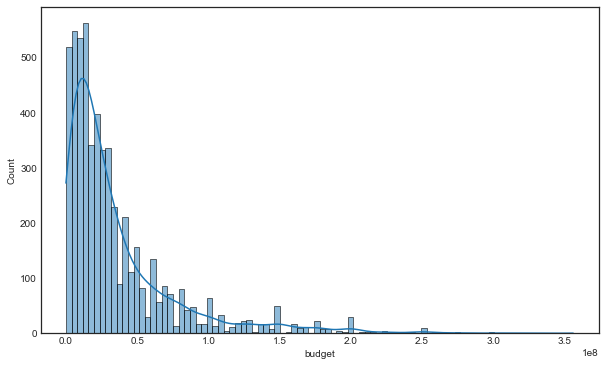

In [42]:
sns.histplot(dfRaw.budget, kde=True)

'Budget' is skewed right, so using median to fill na is better than using mean. <br>

Notes：Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.

In [43]:
# fill budget with median

df = dfRaw.copy()
df['budget'] = df['budget'].fillna(df['budget'].median())

In [44]:
df.describe().apply(lambda s: s.apply('{0:,.3f}'.format))

,year,score,votes,budget,gross,runtime
count,"7,668.000","7,665.000","7,665.000","7,668.000","7,479.000","7,664.000"
mean,"2,000.405",6.390,"88,108.505","31,317,559.915","78,500,541.018",107.262
std,11.154,0.969,"163,323.764","35,752,727.935","165,725,124.319",18.581
min,"1,980.000",1.900,7.000,"3,000.000",309.000,55.000
25%,"1,991.000",5.800,"9,100.000","14,000,000.000","4,532,055.500",95.000
50%,"2,000.000",6.500,"33,000.000","20,500,000.000","20,205,757.000",104.000
75%,"2,010.000",7.100,"93,000.000","32,000,000.000","76,016,691.500",116.000
max,"2,020.000",9.300,"2,400,000.000","356,000,000.000","2,847,246,203.000",366.000


Text(0.5, 1.0, 'Budget vs Gross Earnings')

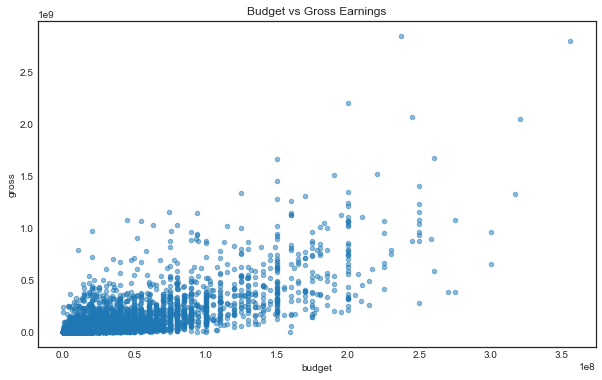

In [45]:
df.plot(kind='scatter', x='budget', y='gross', alpha=0.5)
plt.title('Budget vs Gross Earnings')

<AxesSubplot:xlabel='gross', ylabel='Count'>

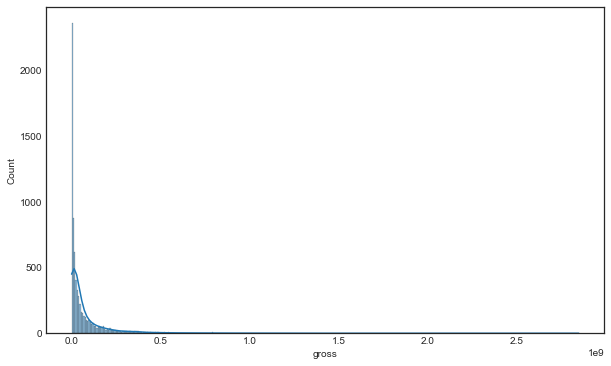

In [46]:
# check outliers, especially for 'gross'

sns.histplot(dfRaw.gross, kde=True)

<AxesSubplot:>

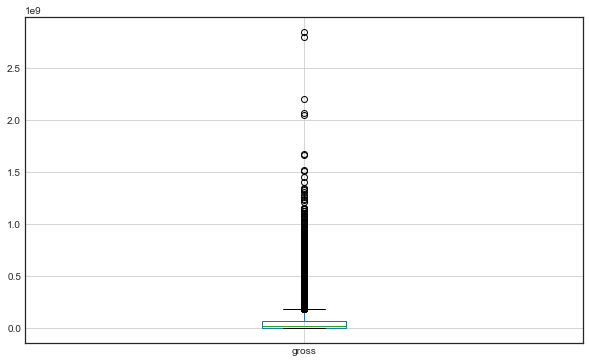

In [47]:
dfRaw.boxplot(column=['gross'])

Value in 'gross' can get really high, but hard to justify a drop of value right now. <br>

Note: the upper bar of the box is Q3 + 1.5*IQR (3rd quantile + 1.5 times the difference of the 1st and 3rd quantile)

In [49]:
# check data validation

dfRaw.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


By eyeballing, 'year', 'released', 'country' contain related information, but there are potential conflicts. <br>

-> index[0] 'released' conflicts with 'country' <br>
-> index[8] 'released' conflicts with 'year'<br>

Will do more data cleaning if these three fields are of interest, otherwise leave as is for now for simplicity.

In [50]:
# check for data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [51]:
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [52]:
df['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', nan, 'United Arab Emirates', 'Indonesia', 'Turkey',
       'Serbia', 'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile',
       'Panama', 'Malta', 'Lebanon'], dtype=object)

In [53]:
df['company'].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Dow Jazz Films', 'Embi Productions', 'PK 65 Films'], dtype=object)

Mignt need to change some object columns (ex. 'rating', 'genre') into categorical for correlation analysis later.

### Step 3. Correlation Analysis

In [54]:
# run a correlation matrix

corr_matrix = df.corr()
corr_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.291690,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.061979,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.460932,0.630757,0.309212
budget,0.291690,0.061979,0.460932,1.000000,0.745552,0.273363
gross,0.257486,0.186258,0.630757,0.745552,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.273363,0.245216,1.000000


In [55]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [56]:
# change selected object columns (i.e. 'rating', 'genre', 'year', 'country', 'company') into categorical

for col in df.columns:
    if col in ['rating', 'genre', 'year', 'country', 'company']:
        df[col] = df[col].astype('category').cat.codes

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,6,6,0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,54,19000000.0,46998772.0,2319,146.0
1,The Blue Lagoon,6,1,0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,55,4500000.0,58853106.0,731,104.0
2,Star Wars: Episode V - The Empire Strikes Back,4,0,0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,55,18000000.0,538375067.0,1540,124.0
3,Airplane!,4,4,0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,55,3500000.0,83453539.0,1812,88.0
4,Caddyshack,6,4,0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,55,6000000.0,39846344.0,1777,98.0


In [57]:
corr_matrix = df.corr()
corr_matrix

,rating,genre,year,score,votes,country,budget,gross,company,runtime
rating,1.000000,0.072423,0.008779,-0.001314,0.033225,0.081244,-0.108776,-0.107339,-0.032943,0.062145
genre,0.072423,1.000000,-0.081261,0.027965,-0.145307,-0.037615,-0.328484,-0.235650,-0.071067,-0.052711
year,0.008779,-0.081261,1.000000,0.097995,0.222945,-0.070938,0.291690,0.257486,-0.010431,0.120811
score,-0.001314,0.027965,0.097995,1.000000,0.409182,-0.133348,0.061979,0.186258,0.001030,0.399451
votes,0.033225,-0.145307,0.222945,0.409182,1.000000,0.073625,0.460932,0.630757,0.133204,0.309212
country,0.081244,-0.037615,-0.070938,-0.133348,0.073625,1.000000,0.082334,0.092129,0.095548,-0.078412
budget,-0.108776,-0.328484,0.291690,0.061979,0.460932,0.082334,1.000000,0.745552,0.167250,0.273363
gross,-0.107339,-0.235650,0.257486,0.186258,0.630757,0.092129,0.745552,1.000000,0.154840,0.245216
company,-0.032943,-0.071067,-0.010431,0.001030,0.133204,0.095548,0.167250,0.154840,1.000000,0.034402
runtime,0.062145,-0.052711,0.120811,0.399451,0.309212,-0.078412,0.273363,0.245216,0.034402,1.000000


In [58]:
corr_matrix['gross'].sort_values(ascending=False)

gross      1.000000
budget     0.745552
votes      0.630757
year       0.257486
runtime    0.245216
score      0.186258
company    0.154840
country    0.092129
rating    -0.107339
genre     -0.235650
Name: gross, dtype: float64

Based on current data, 'gross' is highly correlated with 'budget', 'votes'. 
On the other hand, 'country' and 'rating' don't matter much.

<AxesSubplot:xlabel='budget', ylabel='gross'>

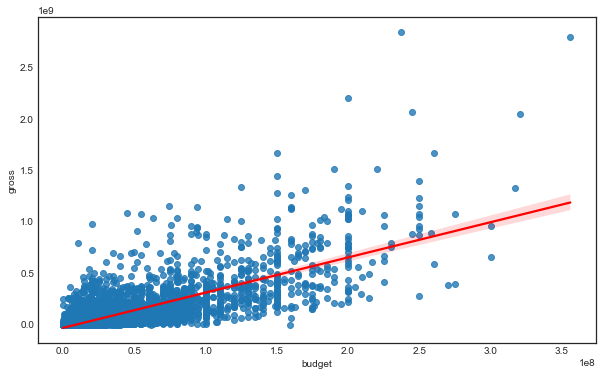

In [59]:
# plot 'gross' and 'budget' 

sns.regplot(y='gross', x='budget', data=df, line_kws={'color':'red'})

# try log(y), log(x)
# sns.regplot(y=np.log(df['gross']), x='budget', data=df, line_kws={'color':'red'})
# sns.regplot(y=np.log(df['gross']), x='budget', data=df, logx=True, line_kws={'color':'red'})

<AxesSubplot:xlabel='votes', ylabel='gross'>

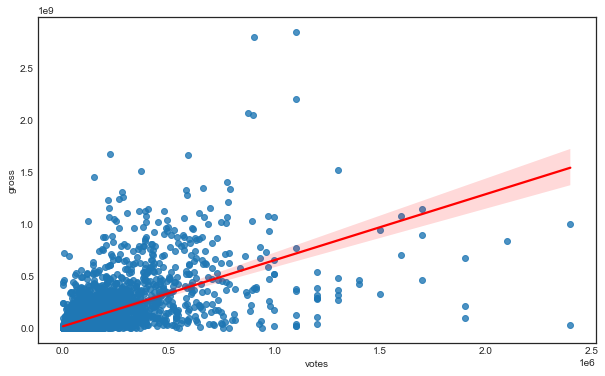

In [60]:
# plot 'gross' and 'votes' 

sns.regplot(y='gross', x='votes', data=df, line_kws={'color':'red'})

<AxesSubplot:xlabel='gross', ylabel='rating'>

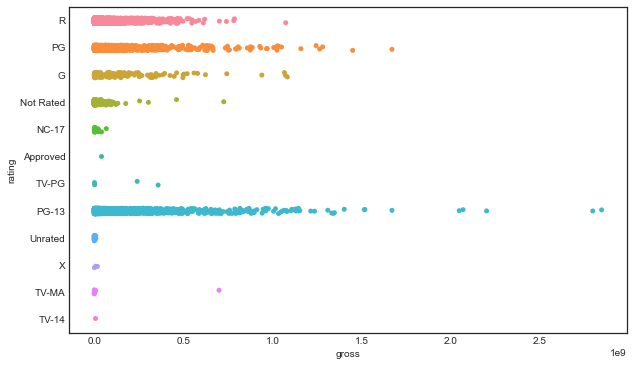

In [61]:
# also plot categorical fields
# plot 'rating', 'gross'

sns.stripplot(y="rating", x="gross", data=dfRaw)

<AxesSubplot:xlabel='gross', ylabel='genre'>

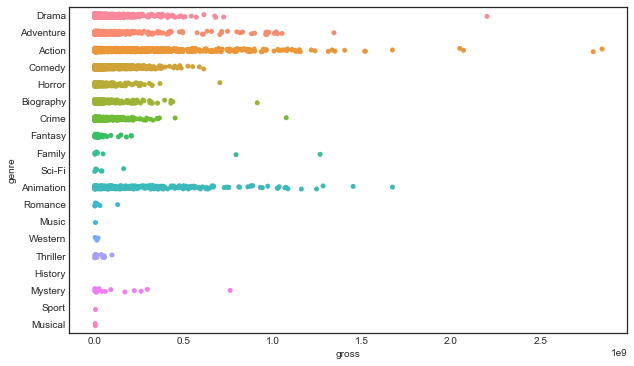

In [62]:
# plot 'genre', 'gross'

sns.stripplot(y="genre", x="gross", data=dfRaw)

Some 'rating' (eg. PG-13) and 'genre' (eg. Action) are more popular than others and earn higher gross revenue.

### Step 4. Regression (OLS)

In [63]:
# Import packages and classes

import sklearn.linear_model
import statsmodels.api as sm

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   int8   
 2   genre     7668 non-null   int8   
 3   year      7668 non-null   int8   
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7668 non-null   int8   
 11  budget    7668 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7668 non-null   int16  
 14  runtime   7664 non-null   float64
dtypes: float64(5), int16(1), int8(4), object(5)
memory usage: 644.1+ KB


In [88]:
# prepare data for regression analysis
# drop null values, and drop columns where data type is object

dfReg = df.drop(columns = ['name', 'released', 'director', 'writer', 'star', 'company', 'score', 'genre']).dropna().copy()
dfReg.info()
dfReg.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7478 entries, 0 to 7659
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   7478 non-null   int8   
 1   year     7478 non-null   int8   
 2   votes    7478 non-null   float64
 3   country  7478 non-null   int8   
 4   budget   7478 non-null   float64
 5   gross    7478 non-null   float64
 6   runtime  7478 non-null   float64
dtypes: float64(4), int8(3)
memory usage: 314.0 KB


,rating,year,votes,country,budget,gross,runtime
7653,6,40,2400.0,55,20500000.0,3661.0,98.0
7655,9,40,1300.0,8,20500000.0,240663149.0,110.0
7656,5,40,294.0,55,20500000.0,413378.0,120.0
7657,-1,40,903.0,8,20500000.0,25818882.0,135.0
7659,3,40,447.0,55,20500000.0,13266.0,87.0


In [89]:
# Prepare regressor and target

y = np.array(dfReg['gross']).reshape(-1,1)
x = dfReg.drop(columns=['gross'])

In [90]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7478 entries, 0 to 7659
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   7478 non-null   int8   
 1   year     7478 non-null   int8   
 2   votes    7478 non-null   float64
 3   country  7478 non-null   int8   
 4   budget   7478 non-null   float64
 5   runtime  7478 non-null   float64
dtypes: float64(3), int8(3)
memory usage: 255.6 KB


In [91]:
# 'gross' ~ 'budget' + other fields

X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2474.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        14:32:06   Log-Likelihood:            -1.4805e+05
No. Observations:                7478   AIC:                         2.961e+05
Df Residuals:                    7471   BIC:                         2.962e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.723e+05   9.13e+06     -0.052      0.9

C:\Users\kylie\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Field 'votes' and 'budget' are statistically significant influencers of the final gross revenue. <br>
Field 'runtime', 'rating', 'country' also are statistically significant. <br>
IMDb score and company, however, are not.

### Step 5. Machine Learning model


Split training and testing data sets for machine learning. <br>
Set 80% to be training set, and 20% to be testing set.

In [92]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dfReg, test_size=0.2, random_state=42)

In [93]:
train_set.shape, test_set.shape

((5982, 7), (1496, 7))

In [94]:
train_target = train_set['gross']
# train_target = train_target.reshape(len(train_target),-1)
train_target

442        272278.0
6860    448906865.0
4223     19233280.0
481     333107271.0
2630      1316865.0
           ...     
5362     16937968.0
5397     40877556.0
5561     73830347.0
936      15945534.0
7446     40811919.0
Name: gross, Length: 5982, dtype: float64

In [95]:
train_features = train_set.drop(columns=['gross'])
train_features

,rating,year,votes,country,budget,runtime
442,4,3,1300.0,55,20500000.0,113.0
6860,5,36,527000.0,55,30000000.0,128.0
4223,5,22,15000.0,55,13000000.0,98.0
481,4,4,459000.0,55,28000000.0,118.0
2630,4,14,3400.0,55,15000000.0,108.0
...,...,...,...,...,...,...
5362,6,28,48000.0,55,20500000.0,113.0
5397,5,28,51000.0,54,62000000.0,87.0
5561,5,29,31000.0,55,20000000.0,108.0
936,5,6,11000.0,55,12000000.0,88.0


In [96]:
test_target = test_set['gross']
test_features = test_set.drop(columns=['gross'])

In [97]:
test_features

,rating,year,votes,country,budget,runtime
2336,5,13,29000.0,55,14000000.0,120.0
3204,4,17,15000.0,55,30000000.0,87.0
1722,6,10,18000.0,55,4000000.0,89.0
1755,4,10,11000.0,55,24000000.0,112.0
928,6,6,15000.0,55,5000000.0,89.0
...,...,...,...,...,...,...
2036,4,11,1700.0,55,14000000.0,99.0
1406,4,8,3500.0,55,18000000.0,105.0
459,4,3,786.0,55,20500000.0,103.0
3707,6,20,51000.0,55,7000000.0,120.0


In [98]:
train_target.shape, train_features.shape

((5982,), (5982, 6))

In [99]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(train_features, train_target)

LinearRegression()

In [100]:
coef = pd.DataFrame({'col_name': train_features.columns,
                    'coef': regression.coef_})
coef

,col_name,coef
0,rating,-6.696906e+06
1,year,3.434518e+05
2,votes,3.690448e+02
3,country,3.541243e+05
4,budget,2.569456e+00
5,runtime,-2.270372e+05


In [101]:
regression.intercept_

-2083346.620623514

In [82]:
from sklearn.metrics import mean_squared_error

In [102]:
gross_predictions_on_train = regression.predict(train_features)
mse = mean_squared_error(train_target, gross_predictions_on_train)
sqrtmse = np.sqrt(mse)
sqrtmse

92934979.3253795

In [123]:
train_target.shape, gross_predictions_on_train.shape

((5982,), (5982,))

In [125]:
train_target

442        272278.0
6860    448906865.0
4223     19233280.0
481     333107271.0
2630      1316865.0
           ...     
5362     16937968.0
5397     40877556.0
5561     73830347.0
936      15945534.0
7446     40811919.0
Name: gross, Length: 5982, dtype: float64

In [163]:
target_on_train = pd.DataFrame(train_target)
target_on_train.columns =['target_on_train']
target_on_train.info()
target_on_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 442 to 7446
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target_on_train  5982 non-null   float64
dtypes: float64(1)
memory usage: 222.5 KB


,target_on_train
442,272278.0
6860,448906865.0
4223,19233280.0
481,333107271.0
2630,1316865.0
...,...
5362,16937968.0
5397,40877556.0
5561,73830347.0
936,15945534.0


In [144]:
# Checking for NaN elements in a NumPy array returns True if the array contains any NaN elements and False otherwise

array_sum = np.sum(target_on_train)
print(np.isnan(array_sum))

gross    False
dtype: bool


In [126]:
gross_predictions_on_train

array([1.9135e+07, 2.3878e+08, 8.1539e+06, ..., 3.2179e+07, 8.8336e+05,
       2.6896e+07])

In [168]:
predit_on_train = pd.DataFrame(gross_predictions_on_train.reshape(5982,-1), index=target_on_train.index)
predit_on_train.columns =['predit_on_train']
predit_on_train

,predit_on_train
442,1.913462e+07
6860,2.387827e+08
4223,8.153851e+06
481,2.065256e+08
2630,1.069076e+07
...,...
5362,3.156149e+07
5397,1.515468e+08
5561,3.217855e+07
936,8.833595e+05


In [170]:
# combine the predit value and the target value for the training set

train = pd.merge(target_on_train, predit_on_train, on =target_on_train.index)
train.info()
train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 5981
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key_0            5982 non-null   int64  
 1   target_on_train  5982 non-null   float64
 2   predit_on_train  5982 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 186.9 KB


,key_0,target_on_train,predit_on_train
0,442,272278.0,1.913462e+07
1,6860,448906865.0,2.387827e+08
2,4223,19233280.0,8.153851e+06
3,481,333107271.0,2.065256e+08
4,2630,1316865.0,1.069076e+07
...,...,...,...
5977,5362,16937968.0,3.156149e+07
5978,5397,40877556.0,1.515468e+08
5979,5561,73830347.0,3.217855e+07
5980,936,15945534.0,8.833595e+05


<AxesSubplot:xlabel='predit_on_train', ylabel='target_on_train'>

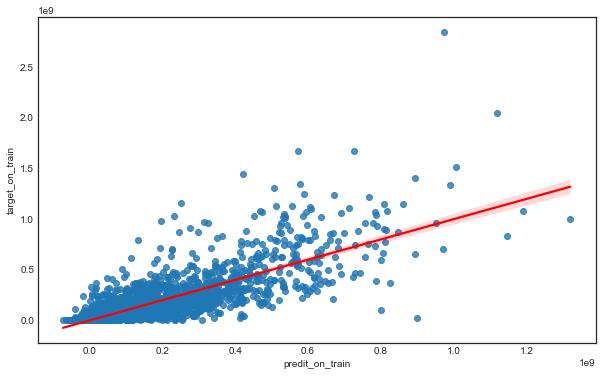

In [165]:
sns.regplot(y='target_on_train', x='predit_on_train', data=train, line_kws={'color':'red'})

In [166]:
gross_predictions_on_test = regression.predict(test_features)
mse = mean_squared_error(test_target, gross_predictions_on_test)
sqrtmse = np.sqrt(mse)
sqrtmse

107049610.57981107

Training result is better when the movie income is lower. 

In [167]:
test_target.shape, gross_predictions_on_test.shape

((1496,), (1496,))

In [171]:
target_on_test = pd.DataFrame(test_target)
target_on_test.columns =['target_on_test']
target_on_test.info()
target_on_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 2336 to 881
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   target_on_test  1496 non-null   float64
dtypes: float64(1)
memory usage: 55.7 KB


,target_on_test
2336,63513743.0
3204,21437192.0
1722,16853487.0
1755,2319124.0
928,12947763.0
...,...
2036,8906823.0
1406,9129999.0
459,6857733.0
3707,28780255.0


In [173]:
predit_on_test = pd.DataFrame(gross_predictions_on_test.reshape(1496,-1), index=target_on_test.index)
predit_on_test.columns =['predit_on_test']
predit_on_test

,predit_on_test
2336,7.804050e+06
3204,5.931166e+07
1722,-2.263911e+07
1755,3.433865e+07
928,-2.255060e+07
...,...
2036,8.506910e+06
1406,1.705644e+07
459,2.121530e+07
3707,-6.355899e+06


In [177]:
# combine the predit value and the target value for the test set

test = pd.merge(target_on_test, predit_on_test, on =target_on_test.index)
test.info()
test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1495
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key_0           1496 non-null   int64  
 1   target_on_test  1496 non-null   float64
 2   predit_on_test  1496 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 46.8 KB


,key_0,target_on_test,predit_on_test
0,2336,63513743.0,7.804050e+06
1,3204,21437192.0,5.931166e+07
2,1722,16853487.0,-2.263911e+07
3,1755,2319124.0,3.433865e+07
4,928,12947763.0,-2.255060e+07
...,...,...,...
1491,2036,8906823.0,8.506910e+06
1492,1406,9129999.0,1.705644e+07
1493,459,6857733.0,2.121530e+07
1494,3707,28780255.0,-6.355899e+06


<AxesSubplot:xlabel='predit_on_test', ylabel='target_on_test'>

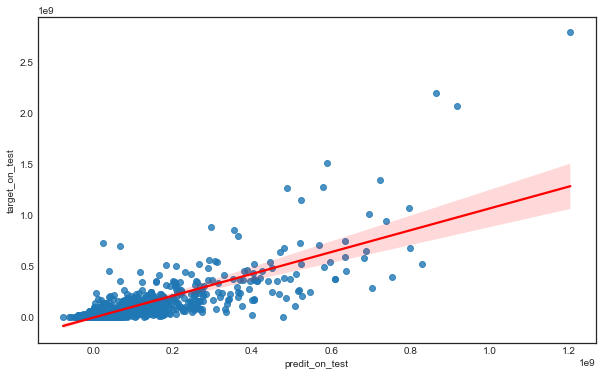

In [176]:
sns.regplot(y='target_on_test', x='predit_on_test', data=test, line_kws={'color':'red'})

The current linear machine learning model provides a basic guideline on movie gross income. <br>

The forecast could potentially be improved by further data cleaning (especially on outliers), getting extra data points, or adopting non-linear fitting models.